In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json

In [2]:
url = "https://api-publica.datajud.cnj.jus.br/api_publica_tjsp/_search"
api_key = "APIKey cDZHYzlZa0JadVREZDJCendQbXY6SkJlTzNjLV9TRENyQk1RdnFKZGRQdw==" # Chave pública

payload = json.dumps({
  "size": 10000,
  "query": {
    "match": {"classe.codigo": 12729}  # 12729 (Exec. de Med. Alternativas)
  },
  "sort": [{"dataAjuizamento": {"order": "desc"}}] # ou asc
})

headers = {
  'Authorization': api_key,
  'Content-Type': 'application/json'
}

response = requests.request("POST", url, headers=headers, data=payload)  # <Response [200]>
dados_dict = response.json() # <class 'dict'>
print(len(dados_dict))

4


In [3]:
display(dados_dict['hits']['hits'][0])

{'_index': 'api_publica_tjsp',
 '_type': '_doc',
 '_id': 'TJSP_12729_G1_9514_15033519320238260132',
 '_score': None,
 '_source': {'classe': {'codigo': 12729,
   'nome': 'Execução de Medidas Alternativas no Juízo Comum'},
  'numeroProcesso': '15033519320238260132',
  'sistema': {'codigo': 3, 'nome': 'SAJ'},
  'formato': {'codigo': 1, 'nome': 'Eletrônico'},
  'tribunal': 'TJSP',
  'dataHoraUltimaAtualizacao': '2023-09-30T06:13:37.936Z',
  'grau': 'G1',
  '@timestamp': '2023-10-16T23:03:43.635Z',
  'dataAjuizamento': '2023-08-31T17:20:52.000Z',
  'movimentos': [{'complementosTabelados': [{'codigo': 2,
      'valor': 2,
      'nome': 'sorteio',
      'descricao': 'tipo_de_distribuicao_redistribuicao'}],
    'codigo': 26,
    'nome': 'Distribuição',
    'dataHora': '2023-08-31T18:00:41.000Z'},
   {'complementosTabelados': [{'codigo': 4,
      'valor': 80,
      'nome': 'Outros documentos',
      'descricao': 'tipo_de_documento'}],
    'codigo': 581,
    'nome': 'Documento',
    'dataHora': 

In [4]:
processos = []

for processo in dados_dict['hits']['hits']:
  numero_processo = processo['_source']['numeroProcesso']
  grau = processo['_source']['grau']
  classe = processo['_source']['classe']['nome']
  assuntos = processo['_source']['assuntos'] # Pode ter mais de um
  data_ajuizamento = processo['_source']['dataAjuizamento']
  ultima_atualizacao = processo['_source']['dataHoraUltimaAtualizacao']
  formato = processo['_source']['formato']['nome']
  codigo = processo['_source']['orgaoJulgador']['codigo']
  orgao_julgador = processo['_source']['orgaoJulgador']['nome']
  municipio = processo['_source']['orgaoJulgador']['codigoMunicipioIBGE']
  sort = processo['sort'][0]
  try:
    movimentos = processo['_source']['movimentos']
  except:
    movimentos = []

  processos.append([numero_processo, classe, data_ajuizamento, ultima_atualizacao, formato, \
                    codigo, orgao_julgador, municipio, grau, assuntos, movimentos, sort])

df = pd.DataFrame(processos, columns=['numero_processo', 'classe', 'data_ajuizamento', 'ultima_atualizacao', \
                      'formato', 'codigo', 'orgao_julgador', 'municipio', 'grau', 'assuntos', 'movimentos', 'sort'])   

df.sample(5)               

,numero_processo,classe,data_ajuizamento,ultima_atualizacao,formato,codigo,orgao_julgador,municipio,grau,assuntos,movimentos,sort
5789,10077714920238260602,Execução de Medidas Alternativas no Juízo Comum,2023-03-06T14:10:23.000Z,2023-08-29T16:29:13.589Z,Eletrônico,10703,02 CRIMINAL DE SUZANO,3552502,G1,"[{'codigo': 15056, 'nome': 'Acordo de Não Pers...","[{'complementosTabelados': [{'codigo': 2, 'val...",1678111823000
9084,10320609720228260564,Execução de Medidas Alternativas no Juízo Comum,2022-11-04T20:00:47.000Z,2023-07-19T05:07:14.799Z,Eletrônico,10301,JURI/EXECUCOES DE SAO BERNARDO DO CAMPO,3548708,G1,"[{'codigo': 15056, 'nome': 'Acordo de Não Pers...","[{'complementosTabelados': [{'codigo': 2, 'val...",1667592047000
9465,10130912020228260019,Execução de Medidas Alternativas no Juízo Comum,2022-10-26T19:33:24.000Z,2023-08-30T04:31:32.336Z,Eletrônico,9272,JURI/EXEC./INF.JUV. DE AMERICANA,3501608,G1,"[{'codigo': 15056, 'nome': 'Acordo de Não Pers...","[{'complementosTabelados': [{'codigo': 2, 'val...",1666812804000
9848,10462781320228260506,Execução de Medidas Alternativas no Juízo Comum,2022-10-18T12:58:40.000Z,2023-07-19T03:39:33.199Z,Eletrônico,10189,02 JURI/EXECUCOES DE RIBEIRAO PRETO,3543402,G1,"[{'codigo': 15056, 'nome': 'Acordo de Não Pers...","[{'complementosTabelados': [{'codigo': 2, 'val...",1666097920000
3523,00003845020238260456,Execução de Medidas Alternativas no Juízo Comum,2023-05-04T08:55:43.000Z,2023-08-30T06:37:30.204Z,Eletrônico,10081,01 CUMULATIVA DE PIRAPOZINHO,3539202,G1,"[{'codigo': 15056, 'nome': 'Acordo de Não Pers...","[{'complementosTabelados': [{'codigo': 2, 'val...",1683190543000


In [5]:
def converte_data(data_str):
    return pd.to_datetime(data_str).tz_convert('America/Sao_Paulo')


def gera_lista_assuntos(assuntos_do_df):
    lst_assuntos=[]
    for assunto in assuntos_do_df:
        try:
            lst_assuntos.append(assunto.get('nome'))
        except:
            lst_assuntos.append('')

    return lst_assuntos


def gera_lista_movimentos(movimentos):
    lst_movimentos_final =[]
    for movimento in movimentos:
        codigo = movimento.get('codigo')
        nome = movimento.get('nome')
        data_hora = movimento.get('dataHora')
        if data_hora:
            data_hora = converte_data(data_hora)
        lst_movimentos_final.append([codigo, nome, data_hora])
    return lst_movimentos_final

In [6]:
df['assuntos'] = df['assuntos'].apply(gera_lista_assuntos)
df['movimentos'] = df['movimentos'].apply(gera_lista_movimentos)
df['data_ajuizamento'] = df['data_ajuizamento'].apply(converte_data)
df['ultima_atualizacao'] = df['ultima_atualizacao'].apply(converte_data)
df['movimentos']= df['movimentos'].apply(lambda x: sorted(x, key=lambda tup: tup[2], reverse=False))
df.sample(5)

,numero_processo,classe,data_ajuizamento,ultima_atualizacao,formato,codigo,orgao_julgador,municipio,grau,assuntos,movimentos,sort
1262,10018745120238260372,Execução de Medidas Alternativas no Juízo Comum,2023-07-03 08:24:52-03:00,2023-08-30 05:40:07.896000-03:00,Eletrônico,9952,01 CUMULATIVA DE MONTE MOR,3531803,G1,[Acordo de Não Persecução Penal],"[[26, Distribuição, 2023-07-04 06:19:50-03:00]...",1688383492000
9348,10054452520228260191,Execução de Medidas Alternativas no Juízo Comum,2022-10-29 12:54:12-03:00,2023-08-29 12:15:40.393000-03:00,Eletrônico,16477,02 CUMULATIVA DE FERRAZ DE VASCONCELOS,3515707,G1,[Acordo de Não Persecução Penal],"[[26, Distribuição, 2022-10-31 07:26:03-03:00]...",1667058852000
6373,10009702020238260408,Execução de Medidas Alternativas no Juízo Comum,2023-02-17 05:05:29-03:00,2023-08-30 04:55:36.364000-03:00,Eletrônico,9525,VARA UNICA DE CHAVANTES,3557204,G1,[Acordo de Não Persecução Penal],"[[26, Distribuição, 2023-02-17 07:41:01-03:00]...",1676621129000
9354,10097439020228260278,Execução de Medidas Alternativas no Juízo Comum,2022-10-28 14:06:39-03:00,2023-09-30 03:24:03.378000-03:00,Eletrônico,9752,01 CRIMINAL DE ITAQUAQUECETUBA,3523107,G1,[Acordo de Não Persecução Penal],"[[26, Distribuição, 2022-10-31 07:03:01-03:00]...",1666976799000
5410,10011216020238260157,Execução de Medidas Alternativas no Juízo Comum,2023-03-16 10:31:59-03:00,2023-07-19 02:24:20.509000-03:00,Eletrônico,9546,01 CUMULATIVA DE CUBATAO,3513504,G1,[Acordo de Não Persecução Penal],"[[26, Distribuição, 2023-03-17 07:37:07-03:00]...",1678973519000


In [7]:
# Gravação dos arquivos

df.to_csv('anpp.csv', sep=',', header=True, index=False)

with open('movimentos_anpp.txt', 'w') as file:
    for index, row in df.iterrows():
        file.write(f"Autos n. {row['numero_processo']}, Classe: {row['classe']}\n") 
        file.write(f"Ajuizamento: {row['data_ajuizamento']}\n")
        file.write(f"Assuntos: {row['assuntos']}\n\n")
        for movimento in row['movimentos']:  
            file.write(f"{str(movimento[2])} | Cód: {str(movimento[0])} | Mov.: {movimento[1]} \n")
        file.write('\n-----------------------------------------------------------------------------\n\n')

# Análises

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype                            
---  ------              --------------  -----                            
 0   numero_processo     10000 non-null  object                           
 1   classe              10000 non-null  object                           
 2   data_ajuizamento    10000 non-null  datetime64[ns, America/Sao_Paulo]
 3   ultima_atualizacao  10000 non-null  datetime64[ns, America/Sao_Paulo]
 4   formato             10000 non-null  object                           
 5   codigo              10000 non-null  int64                            
 6   orgao_julgador      10000 non-null  object                           
 7   municipio           10000 non-null  int64                            
 8   grau                10000 non-null  object                           
 9   assuntos            10000 non-null  object                    

In [9]:
df['data_ajuizamento'].min()

Timestamp('2022-10-12 20:36:03-0300', tz='America/Sao_Paulo')

In [10]:
df['assuntos'].value_counts()

[Acordo de Não Persecução Penal]                                        9964
[Pena de Multa, Acordo de Não Persecução Penal]                            7
[Pena de Multa]                                                            6
[Acordo de Não Persecução Penal, Prestação de Serviços à Comunidade]       6
[Execução Penal e de Medidas Alternativas]                                 3
[Ação Penal]                                                               3
[Crimes de Trânsito]                                                       2
[Prestação de Serviços à Comunidade, Acordo de Não Persecução Penal]       2
[Acordo de Não Persecução Penal, Acordo de Não Persecução Penal]           2
[Furto ]                                                                   1
[Pena Restritiva de Direitos]                                              1
[Prestação Pecuniária, Acordo de Não Persecução Penal]                     1
[Diligências]                                                              1

In [11]:
mask = df['assuntos'].apply(lambda x: 'Acordo de Não Persecução Penal' in x)
df_anpp = df[mask]
print(f'Total de registros: {len(df_anpp)}')
print(f"Data final: {df_anpp['data_ajuizamento'].max()}")
print(f"Data inicial: {df_anpp['data_ajuizamento'].min()}")

Total de registros: 9982
Data final: 2023-08-31 14:20:52-03:00
Data inicial: 2022-10-12 20:36:03-03:00


In [12]:
df_anpp

,numero_processo,classe,data_ajuizamento,ultima_atualizacao,formato,codigo,orgao_julgador,municipio,grau,assuntos,movimentos,sort
0,15033519320238260132,Execução de Medidas Alternativas no Juízo Comum,2023-08-31 14:20:52-03:00,2023-09-30 03:13:37.936000-03:00,Eletrônico,9514,01 CRIMINAL DE CATANDUVA,3511102,G1,[Acordo de Não Persecução Penal],"[[26, Distribuição, 2023-08-31 15:00:41-03:00]...",1693502452000
1,15033501120238260132,Execução de Medidas Alternativas no Juízo Comum,2023-08-31 14:20:32-03:00,2023-09-30 02:49:08.832000-03:00,Eletrônico,72308,JURI/EXEC./INF.JUV. DE MAUA,3529401,G1,[Acordo de Não Persecução Penal],"[[26, Distribuição, 2023-08-31 15:00:25-03:00]...",1693502432000
2,10241205320238260562,Execução de Medidas Alternativas no Juízo Comum,2023-08-31 13:40:39-03:00,2023-09-30 04:40:34.775000-03:00,Eletrônico,10268,JURI/EXECUCOES DE SANTOS,3548500,G1,[Acordo de Não Persecução Penal],"[[26, Distribuição, 2023-08-31 13:49:23-03:00]...",1693500039000
3,15033458620238260132,Execução de Medidas Alternativas no Juízo Comum,2023-08-31 12:00:23-03:00,2023-09-30 03:13:37.877000-03:00,Eletrônico,9514,01 CRIMINAL DE CATANDUVA,3511102,G1,[Acordo de Não Persecução Penal],"[[26, Distribuição, 2023-08-31 13:01:19-03:00]...",1693494023000
4,10438734020238260224,Execução de Medidas Alternativas no Juízo Comum,2023-08-31 10:31:10-03:00,2023-09-30 13:29:17.444000-03:00,Eletrônico,9674,EXECUCOES CRIMINAIS DE GUARULHOS,3518800,G1,[Acordo de Não Persecução Penal],"[[26, Distribuição, 2023-08-31 13:29:36-03:00]...",1693488670000
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,10054064420228260024,Execução de Medidas Alternativas no Juízo Comum,2022-10-12 20:36:39-03:00,2023-07-19 12:40:15.887000-03:00,Eletrônico,9279,01 CUMULATIVA DE ANDRADINA,3502101,G1,[Acordo de Não Persecução Penal],"[[26, Distribuição, 2022-10-13 07:55:47-03:00]...",1665617799000
9996,10054055920228260024,Execução de Medidas Alternativas no Juízo Comum,2022-10-12 20:36:29-03:00,2023-08-30 02:15:38.712000-03:00,Eletrônico,9279,01 CUMULATIVA DE ANDRADINA,3502101,G1,[Acordo de Não Persecução Penal],"[[26, Distribuição, 2022-10-13 07:54:27-03:00]...",1665617789000
9997,10054047420228260024,Execução de Medidas Alternativas no Juízo Comum,2022-10-12 20:36:20-03:00,2023-07-19 12:40:15.848000-03:00,Eletrônico,9279,01 CUMULATIVA DE ANDRADINA,3502101,G1,[Acordo de Não Persecução Penal],"[[26, Distribuição, 2022-10-13 07:53:00-03:00]...",1665617780000
9998,10054038920228260024,Execução de Medidas Alternativas no Juízo Comum,2022-10-12 20:36:12-03:00,2023-08-30 02:15:38.703000-03:00,Eletrônico,9279,01 CUMULATIVA DE ANDRADINA,3502101,G1,[Acordo de Não Persecução Penal],"[[26, Distribuição, 2022-10-13 07:50:16-03:00]...",1665617772000


In [13]:
df_anpp.set_index('data_ajuizamento', inplace=True)

In [14]:
df_resampled = df_anpp.resample('2W').size()
x = []
y = []
for index, value in df_resampled.items():
    x.append(f'Quinzena de {str(index)[:10]}')
    y.append(value)

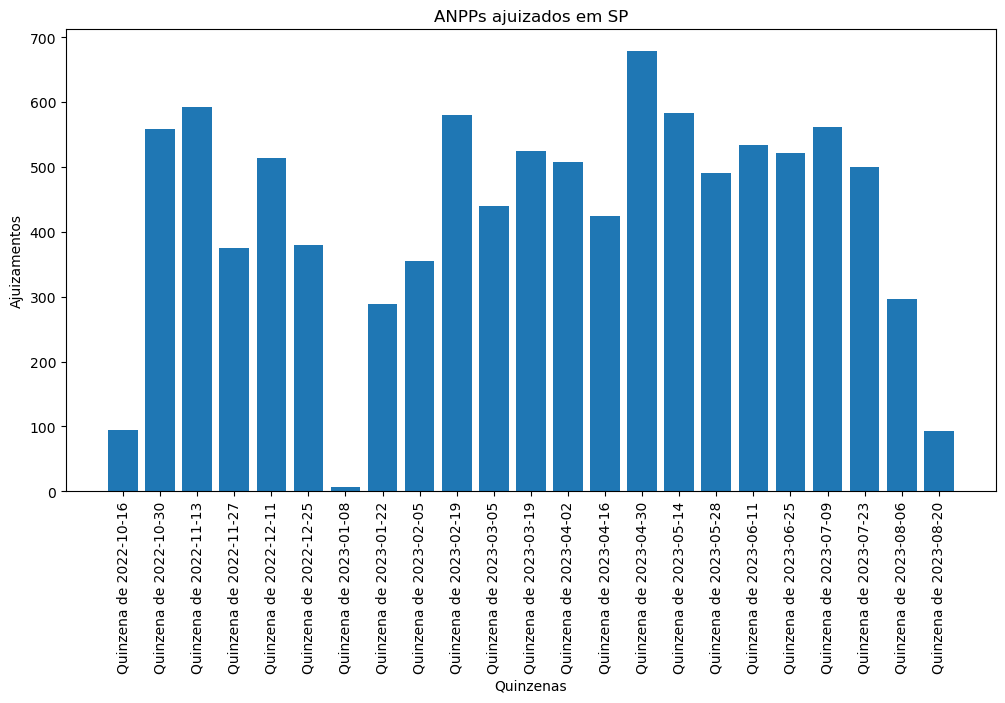

In [15]:
plt.figure(figsize=(12, 6))
plt.bar(x[:-1], y[:-1])

plt.xlabel('Quinzenas')
plt.ylabel('Ajuizamentos')
plt.title('ANPPs ajuizados em SP')
plt.xticks(rotation=90)

plt.show()

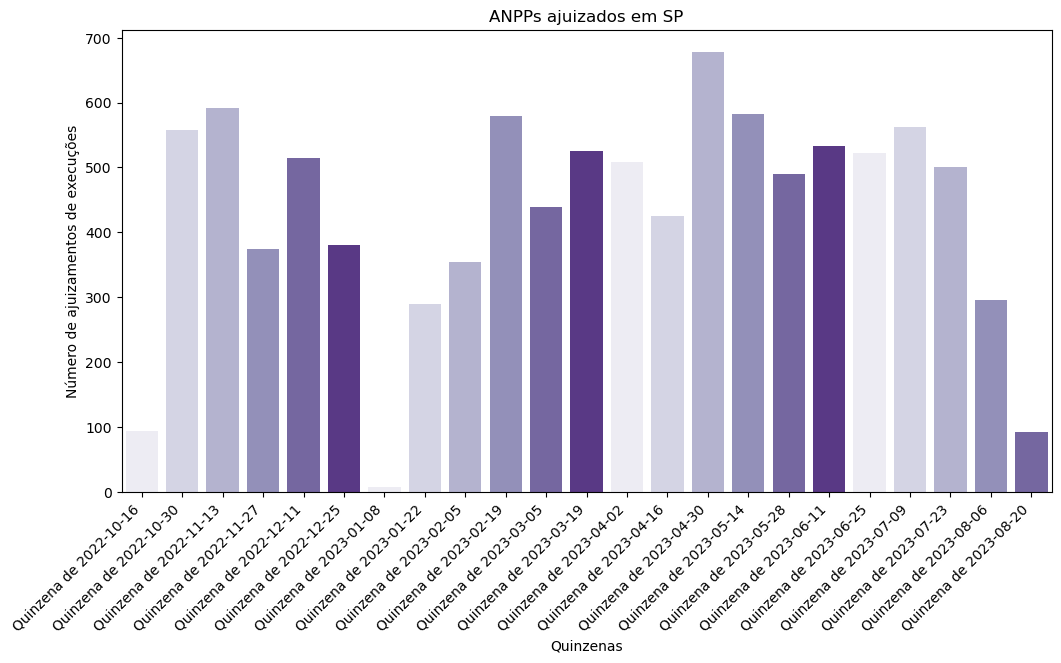

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

palette = sns.color_palette('Purples')
plt.figure(figsize=(12, 6))
sns.barplot(x=x[:-1], y=y[:-1], palette=palette)

plt.xlabel('Quinzenas')
plt.ylabel('Número de ajuizamentos de execuções')
plt.title('ANPPs ajuizados em SP')
plt.xticks(rotation=45, ha='right')

plt.show()

In [17]:
top_100 = df_anpp.groupby(['municipio', 'orgao_julgador'])['codigo'].count().sort_values(ascending=False).head(100)
with open('top_100_ajuizamentos_anpp.txt', 'w') as file:
    for index, value in top_100.items():  
        texto = f"{index[0]} | {index[1]} |{value}"
        file.write(texto + '\n')
        print(texto)

3550308 | 05 EXECUCOES CRIMINAIS DE CENTRAL |1202
3550308 | 02 EXECUCOES CRIMINAIS DE CENTRAL |278
3549805 | EXECUCOES CRIMINAIS DE SAO JOSE DO RIO PRETO |269
3529005 | EXECUCOES CRIMINAIS DE MARILIA |236
3541000 | JURI/EXECUCOES/INFANCIA E JUVENTUDE DE PRAIA GRANDE |215
3529401 | JURI/EXEC./INF.JUV. DE MAUA |203
3518800 | EXECUCOES CRIMINAIS DE GUARULHOS |200
3516200 | JURI/EXEC./INF.JUV. DE FRANCA |190
3520509 | 02 CRIMINAL DE INDAIATUBA |178
3549904 | JURI/EXECUCOES DE SAO JOSE DOS CAMPOS |175
3543907 | JURI/EXEC./INF.JUV. DE RIO CLARO |164
3538709 | JURI/EXECUCOES DE PIRACICABA |154
3554102 | 02 EXECUCOES CRIMINAIS DE TAUBATE |154
3552205 | JURI/EXECUCOES DE SOROCABA |151
3534401 | JURI/EXECUCOES DE OSASCO |129
3505708 | 01 CRIMINAL DE BARUERI |123
3506003 | 02 EXECUCOES CRIMINAIS DE BAURU |118
3507506 | 02 CRIMINAL DE BOTUCATU |116
3548807 | 02 CRIMINAL DE SAO CAETANO DO SUL |114
3523107 | 01 CRIMINAL DE ITAQUAQUECETUBA |113
3509502 | 01 EXECUCOES CRIMINAIS DE CAMPINAS |109
351350